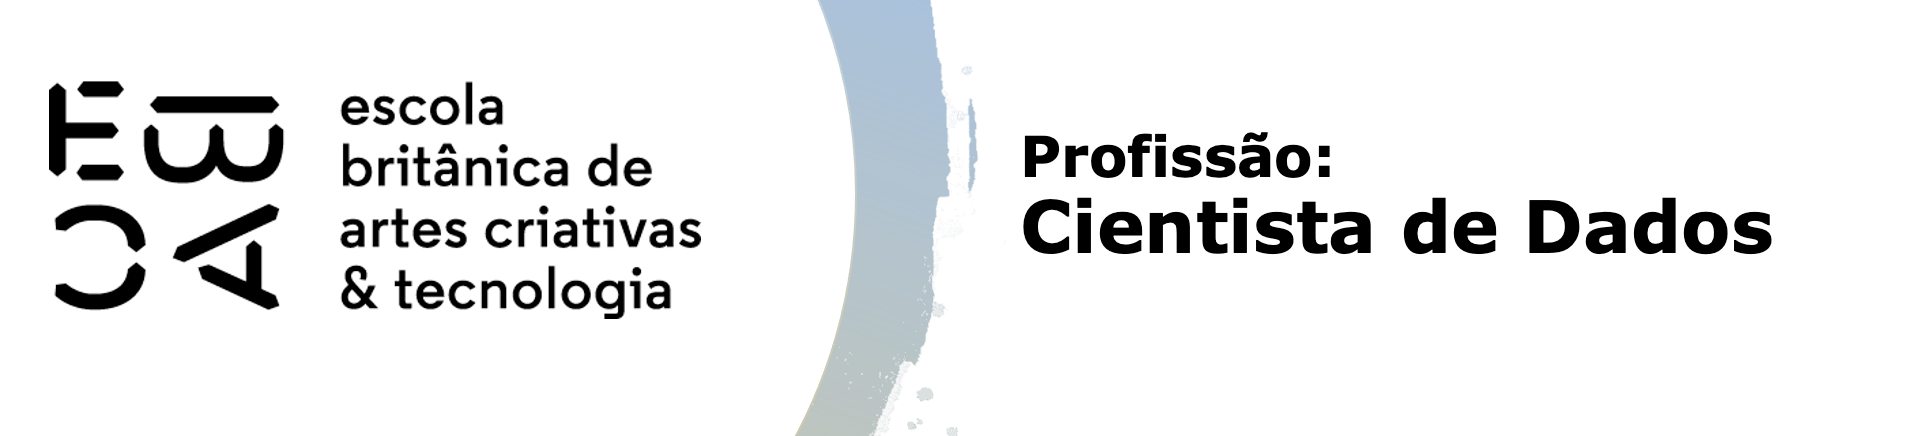

## INFERÊNCIA

PRÉ EXPLICAÇÕES:

**Escolha de teste unilateral ou bilateral:**
- O teste *unilateral* é usado quando esperamos que a diferença entre as médias ocorra em uma única direção. Exemplo: Você quer saber se uma planta cresce mais rápido com um novo fertilizante. Unilateral porque você espera apenas um aumento.

- O teste *bilateral* é usado quando não temos uma direção específica para a diferença e queremos verificar se há uma diferença, independentemente do sentido. Exemplo: Você quer verificar se um novo remédio afeta a pressão arterial, mas não sabe se ele a aumenta ou diminui. Bilateral porque qualquer mudança é relevante.

No nosso caso, queremos avaliar se há diferença entre o peso dos pinguins de acordo com o sexo. Vamos fazer uma exploração inicial no nosso dataframe para ver qual será nossa hipótese nula para então, depois decidirmos entre um teste uni ou bilateral.

In [5]:
import pandas as pd
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [20]:
#carregando a base de dads:
pg = sns.load_dataset('penguins')

In [22]:
#vejamos os tipos das nossas variáveis:
pg.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [24]:
#agrupando por sexo e vendo as estatisticas do peso:
pg.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


Acima, percebemos que temos um número bem próximo de machos e fêmeas, mas que a massa corporal dos machos é ligeiramente maior do que das fêmeas. Vamos observar no gráfico abaixo como o peso de ambos se comporta:

<Axes: xlabel='sex', ylabel='body_mass_g'>

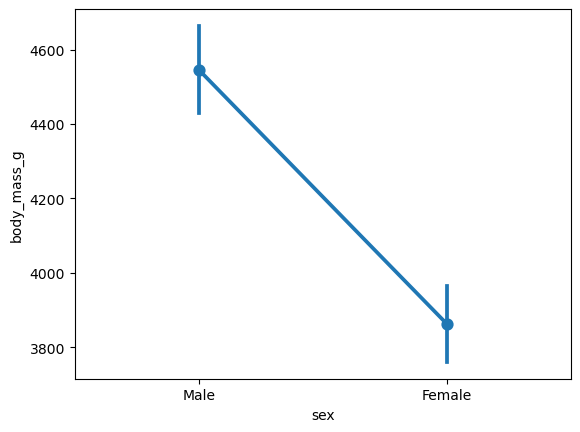

In [27]:
sns.pointplot(data=pg, x='sex', y = 'body_mass_g')

Temos aqui na nossa amostra uma concentração muito maior de peso acima dos 4400g para machos e abaixo dos 4000g para fêmeas. *Logo, nossa hipótese nula aqui é "O peso dos machos  é menor ou inferior ao peso das fêmeas".*

A partir de agora, **iremos trabalhar para rejeitar essa hipótese e abraçar a hipótese nova que seria "O peso dos machos é superior ao peso das fêmeas" e com base nisso, nosso teste será unilateral.**

## INFERÊNCIA - Diferença de peso entre machos e fêmeas

De acordo com a nossa base de pinguins, conseguimos observar que há diferença de peso entre machos e fêmeas. 

Mas será que é uma conclusão extrapolável a toda a população de pinguins? 

Assumindo que nossa amostra é aleatória e representativa da população de pinguins, e considerando que, com base nos dados analisados, observamos que os machos têm um peso médio superior ao das fêmeas, realizaremos um teste t unilateral com nível de significância de 5%. O objetivo é verificar se essa diferença de peso observada pode ser generalizada para toda a população de pinguins.

In [34]:
import scipy.stats as st

# 1. Tamanhos amostrais
n_male = len(pg[pg['sex'] == 'Male'])
n_female = len(pg[pg['sex'] == 'Female'])

# 2. Variância amostral e desvio padrão combinado
var_male = pg[pg['sex'] == 'Male']['body_mass_g'].var()
var_female = pg[pg['sex'] == 'Female']['body_mass_g'].var()

desvpad = (((n_male - 1) * var_male + (n_female - 1) * var_female) / (n_male + n_female - 2)) ** 0.5

# 3. Médias de cada grupo
média_male = pg[pg['sex'] == 'Male']['body_mass_g'].mean()
média_female = pg[pg['sex'] == 'Female']['body_mass_g'].mean()

# 4. Diferença entre as médias
diferença = média_male - média_female  # Numerador da fórmula

# 5. Erro padrão
erro_padrao = desvpad * ((1 / n_male + 1 / n_female) ** 0.5)

# 6. Estatística do teste t
t = diferença / erro_padrao

# 7. Região crítica e p-value (ajustado para teste unilateral)
alpha = 0.05  # Nível de significância
gl = n_male + n_female - 2  # Graus de liberdade
t_critico = st.t.ppf(1 - alpha, gl)  # t crítico para a cauda direita

# Cálculo do p-valor unilateral
p_value = 1 - st.t.cdf(t, gl)  # Probabilidade apenas da cauda direita

# 8. Resultados
print(f'Diferença de médias: {diferença:.2f}')
print(f'Desvio padrão combinado: {desvpad:.2f}')
print(f'Erro padrão: {erro_padrao:.2f}')
print(f'Estatística do teste t: {t:.2f}')
print(f'Região crítica (t crítico para cauda direita): {t_critico:.2f}')
print(f'P-valor: {p_value:.5f}')

Diferença de médias: 683.41
Desvio padrão combinado: 729.98
Erro padrão: 80.01
Estatística do teste t: 8.54
Região crítica (t crítico para cauda direita): 1.65
P-valor: 0.00000


**Vamos interpretar os resultados do teste acima:**

- A diferença média entre o peso de machos e fêmeas é de 683,41g;
- O desvio padrão combinado  o erro padrão mostram como as amostras variam em relação à sua média. No nosso caso, eles mostram uma dispersão considerável.
- A estatística do teste t positiva, nos mostra que a média da primeira amostra (male) é maior que da segunda. E o valor 8,54, bem distante do 0, indica que há uma diferença significativa entre as médias.
- A região crítica assume um valor menor que a estatística do teste t, logo, rejeitaremos a hipotese nula (média igual para os dois sexos).
- P-valor igual a 0 significa que a hipótese nula ("Peso dos machos igual ou inferior ao das fêmeas") deve ser rejeitada, pois a evidência contra ela é extremamente forte.

*Portanto, com a rejeição de H=0, assumimos agora a hipótese alternativa H=1, onde temos que o peso dos pinguins do sexo masculo é maior que dos pinguins do sexo feminino.*

### Representação gráfica do teste acima:

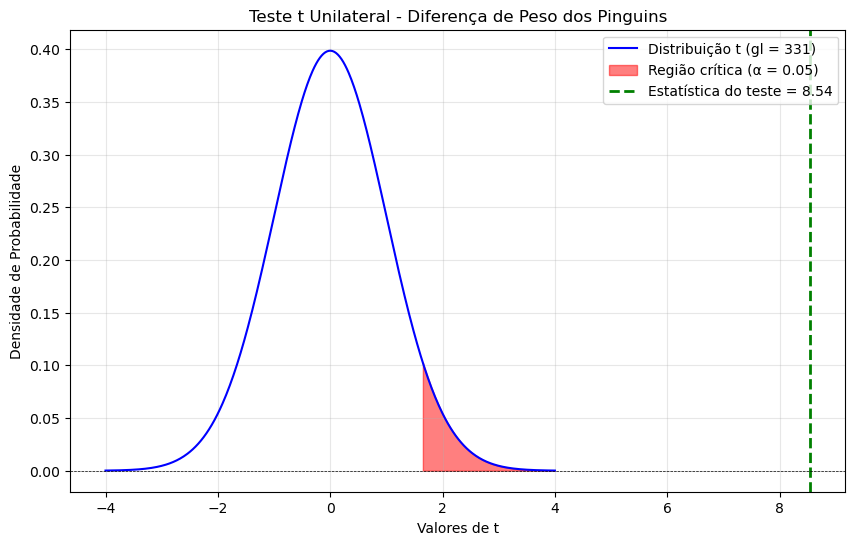

In [46]:
# Recalculando as variáveis necessárias
import pandas as pd
import seaborn as sns
import numpy as np

# Carregar a base de dados `penguins`
pg = sns.load_dataset('penguins')

# Filtrando dados válidos para evitar valores nulos
pg = pg.dropna(subset=['sex', 'body_mass_g'])

# 1. Tamanhos amostrais
n_male = len(pg[pg['sex'] == 'Male'])
n_female = len(pg[pg['sex'] == 'Female'])

# 2. Variância amostral e desvio padrão combinado
var_male = pg[pg['sex'] == 'Male']['body_mass_g'].var()
var_female = pg[pg['sex'] == 'Female']['body_mass_g'].var()

desvpad = (((n_male - 1) * var_male + (n_female - 1) * var_female) / (n_male + n_female - 2)) ** 0.5

# 3. Médias de cada grupo
média_male = pg[pg['sex'] == 'Male']['body_mass_g'].mean()
média_female = pg[pg['sex'] == 'Female']['body_mass_g'].mean()

# 4. Diferença entre as médias
diferença = média_male - média_female

# 5. Erro padrão
erro_padrao = desvpad * ((1 / n_male + 1 / n_female) ** 0.5)

# 6. Estatística do teste t
t = diferença / erro_padrao

# 7. Região crítica e p-value (unilateral)
alpha = 0.05  # Nível de significância
gl = n_male + n_female - 2  # Graus de liberdade
t_critico = st.t.ppf(1 - alpha, gl)

# Preparando para o gráfico
x = np.linspace(-4, 4, 500)
t_dist = st.t.pdf(x, df=gl)  # Função de densidade da distribuição t

# Pontos importantes
t_critico_unilateral = t_critico
t_valor_observado = t

# Criando o gráfico
plt.figure(figsize=(10, 6))

# Curva da distribuição t
plt.plot(x, t_dist, label="Distribuição t (gl = {})".format(gl), color="blue")

# Sombreamento da região crítica (cauda direita)
x_critico = np.linspace(t_critico_unilateral, 4, 500)
plt.fill_between(x_critico, 0, st.t.pdf(x_critico, df=gl), color="red", alpha=0.5, label="Região crítica (α = 0.05)")

# Linha para o valor t observado
plt.axvline(t_valor_observado, color="green", linestyle="--", linewidth=2, label=f"Estatística do teste = {t_valor_observado:.2f}")

# Ajustes no gráfico
plt.title("Teste t Unilateral - Diferença de Peso dos Pinguins")
plt.xlabel("Valores de t")
plt.ylabel("Densidade de Probabilidade")
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.legend()
plt.grid(alpha=0.3)

# Exibindo o gráfico
plt.show()


- Perceba no gráfico acima como a densidade de probabilidade fica maior a medida que se aproxima do zero.
- O valor de **t = 8.54** está **fora da região crítica**, indicando que a estatística do teste observada é significativa.

### Considerando as espécies

Iremos repetir uma vez para cada espécie de pinguim o primeiro teste t de significância 5%, para vermos se as características estendidas a população também se comportam de igual maneira de acordo com as espécies.

In [55]:
import scipy.stats as st

for species in pg['species'].unique():
    # Filtra o DataFrame pela espécie
    pg_species = pg[pg['species'] == species]
    
    # 1. Calcular a variância amostral e o desvio padrão
    desvpad = pg_species.groupby('sex')['body_mass_g'].var().mean() ** 0.5
    
    # 2. Calcular as médias de cada grupo
    Média_Male = pg_species.groupby('sex')['body_mass_g'].mean()['Male']
    Média_Female = pg_species.groupby('sex')['body_mass_g'].mean()['Female']
    
    # 3. Calcular a diferença entre as médias
    diferença = Média_Male - Média_Female
    
    # 4. Calcular o erro padrão
    n_male = len(pg_species[pg_species['sex'] == 'Male'])
    n_female = len(pg_species[pg_species['sex'] == 'Female'])
    erro_padrao = desvpad * ((1 / n_male + 1 / n_female) ** 0.5)
    
    # 5. Estatística do teste t
    t = diferença / erro_padrao
    
    # 6. Região Crítica e p-value (ajustado para teste unilateral)
    gl = n_male + n_female - 2  # Graus de liberdade
    # Região crítica para alfa = 0.05 (unilateral)
    RC = st.t.ppf(0.95, gl)  # Região crítica superior (para hipótese alternativa Male > Female)
    
    # p-valor para teste unilateral
    p_value = 1 - st.t.cdf(t, gl)  # p-valor para a cauda superior
    
    # 7. Resultados
    print(f"Espécie: {species}")
    print(f'Diferença de médias: {diferença:.2f}')
    print(f'Desvio padrão: {desvpad:.2f}')
    print(f'Erro padrão: {erro_padrao:.2f}')
    print(f'Estatística do teste t: {t:.2f}')
    print(f'Região crítica (t crítico para α=0.05 unilateral): {RC:.2f}')
    print(f'p-value: {p_value:.5f}')
    print()


Espécie: Adelie
Diferença de médias: 674.66
Desvio padrão: 310.52
Erro padrão: 51.40
Estatística do teste t: 13.13
Região crítica (t crítico para α=0.05 unilateral): 1.66
p-value: 0.00000

Espécie: Chinstrap
Diferença de médias: 411.76
Desvio padrão: 326.01
Erro padrão: 79.07
Estatística do teste t: 5.21
Região crítica (t crítico para α=0.05 unilateral): 1.67
p-value: 0.00000

Espécie: Gentoo
Diferença de médias: 805.09
Desvio padrão: 297.79
Erro padrão: 54.61
Estatística do teste t: 14.74
Região crítica (t crítico para α=0.05 unilateral): 1.66
p-value: 0.00000



**Interpretação:**

Em todas as três espécies (**Adelie**, **Chinstrap**, **Gentoo**), as estatísticas t observadas estão fora da região crítica, indicando que *a diferença entre as médias dos grupos masculinos e femininos é significativa para todas as espécies*. O p-valor extremamente baixo (0.00000) em todos os casos também reforça essa conclusão, **levando à rejeição da hipótese nula em favor da hipótese alternativa, que sugere que o peso dos pinguins macho é maior.**
